<a href="https://colab.research.google.com/github/hemukurra/deep-learning/blob/main/batch%20vs%20stochastic%20descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# name : hemanth kurra

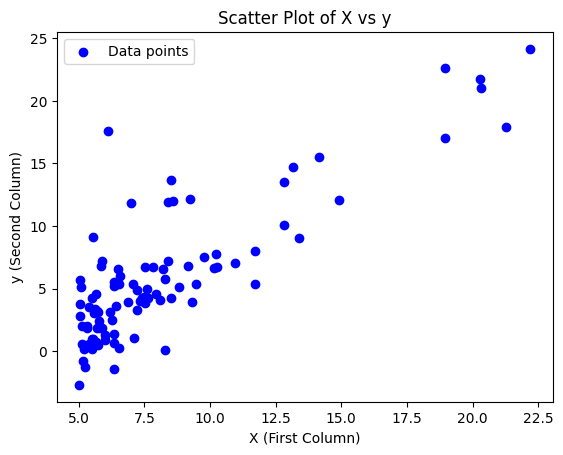

In [10]:
# Q1
import numpy as np
import matplotlib.pyplot as plt




data = np.loadtxt('data2.txt', delimiter=',')


X = data[:, 0]  # First column (x-axis)
y = data[:, 1]  # Second column (y-axis)

# Plotting the data
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X (First Column)')
plt.ylabel('y (Second Column)')
plt.title('Scatter Plot of X vs y')
plt.legend()
plt.show()


In [11]:
# Q2
import numpy as np


X_b = np.c_[np.ones((len(X), 1)), X]

#  Normal equation implementation
def normal_equation(X_b, y):
    return np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# coefficients (w0 and w1) using the normal equation
theta_normal = normal_equation(X_b, y)

print("Coefficients using Normal Equation:")
print(f"Intercept (w0): {theta_normal[0]}")
print(f"Slope (w1): {theta_normal[1]}")


Coefficients using Normal Equation:
Intercept (w0): -3.8957808783118772
Slope (w1): 1.1930336441895957


In [12]:
# Q3 A)

from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
# X_b is the feature matrix with the bias term (intercept), y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)


print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 77
Testing set size: 20


In [13]:
# Q3 b)

import numpy as np
import matplotlib.pyplot as plt

# Function to compute MSE
def compute_mse(X, y, w):
    m = len(y)
    predictions = X.dot(w)
    mse = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return mse

# Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, tol=1e-6):
    m = len(y)
    w = np.random.randn(2)
    mse_history_train = []

    for iteration in range(n_iterations):
        gradients = 1/m * X.T.dot(X.dot(w) - y)
        w = w - learning_rate * gradients
        mse_train = compute_mse(X, y, w)
        mse_history_train.append(mse_train)

        # Stopping condition based on tolerance
        if len(mse_history_train) > 1 and np.abs(mse_history_train[-1] - mse_history_train[-2]) < tol:
            break

    return w, mse_history_train

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=50, tol=1e-6):
    m = len(y)
    w = np.random.randn(2)
    mse_history_train = []

    for iteration in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(w) - yi)
            w = w - learning_rate * gradients
        mse_train = compute_mse(X, y, w)
        mse_history_train.append(mse_train)

        # Stopping condition based on tolerance
        if len(mse_history_train) > 1 and np.abs(mse_history_train[-1] - mse_history_train[-2]) < tol:
            break

    return w, mse_history_train


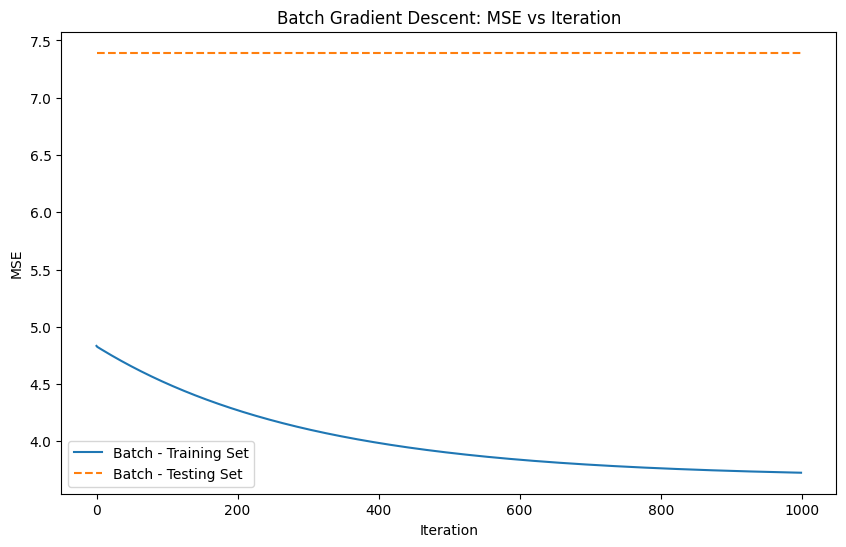

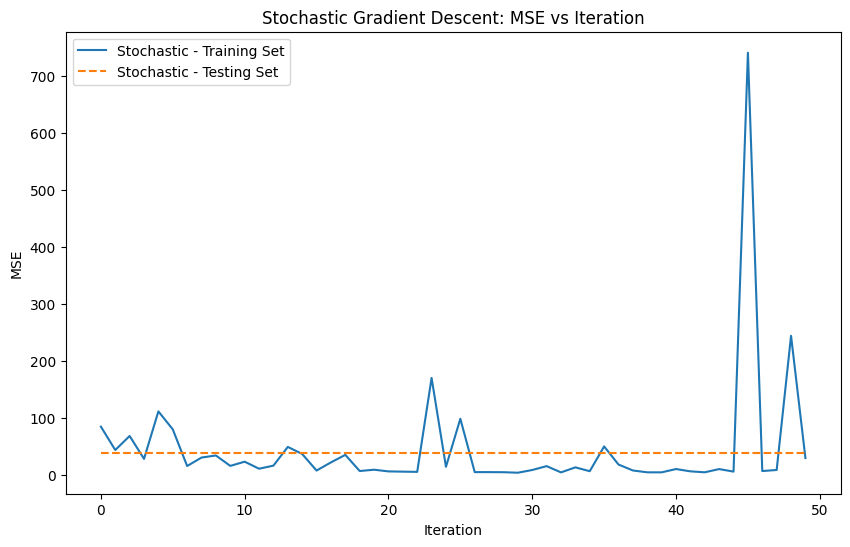

In [14]:
# Q3 b)

# Running Batch Gradient Descent on training set

w_batch, mse_history_batch_train = batch_gradient_descent(X_train, y_train)
mse_history_batch_test = [compute_mse(X_test, y_test, w_batch) for _ in range(len(mse_history_batch_train))]

# Running Stochastic Gradient Descent on training set
w_stochastic, mse_history_stochastic_train = stochastic_gradient_descent(X_train, y_train)
mse_history_stochastic_test = [compute_mse(X_test, y_test, w_stochastic) for _ in range(len(mse_history_stochastic_train))]

#  MSE vs. Iteration for Batch Gradient Descent
plt.figure(figsize=(10, 6))
plt.plot(mse_history_batch_train, label="Batch - Training Set")
plt.plot(mse_history_batch_test, label="Batch - Testing Set", linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Batch Gradient Descent: MSE vs Iteration")
plt.legend()
plt.show()

#  MSE vs. Iteration for Stochastic Gradient Descent
plt.figure(figsize=(10, 6))
plt.plot(mse_history_stochastic_train, label="Stochastic - Training Set")
plt.plot(mse_history_stochastic_test, label="Stochastic - Testing Set", linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Stochastic Gradient Descent: MSE vs Iteration")
plt.legend()
plt.show()

# comment: it seems for batch gradient descent the MSE is going down with iterations however there isnt any notable improvement in MSE on stochastic gradient descent over iterations.
# we used the same 10^-6 tol value as a stopping condition in both cases, this is based on the difference in consecutive MSE sqaured values.
# stochastic descent seems to be affected signifacantly with each weight and get noisier, it converges faster than gradient descent but there is increased volatility.
# so stocastic converges faster but needs to be examined carefully so it doesnt diverge and the threshold needs to be tested.

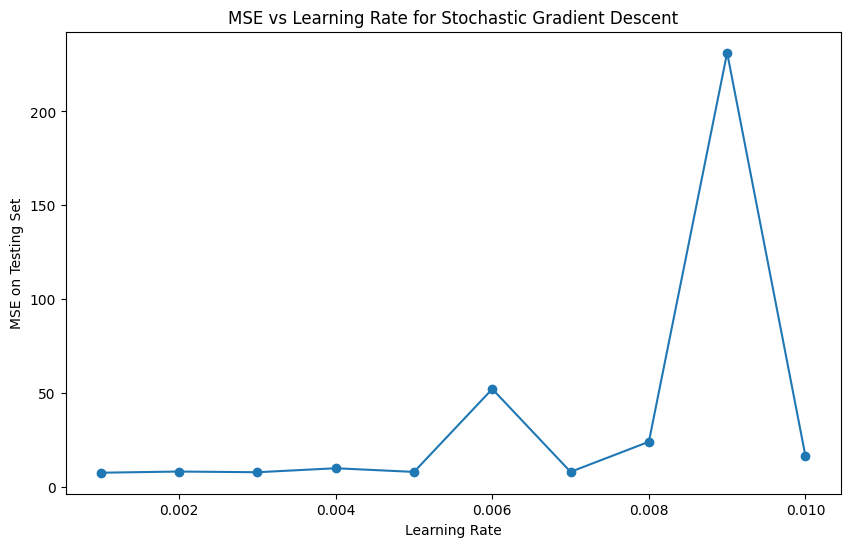

The best learning rate is: 0.001


In [16]:
#Q3 C) we plot learning rate vs MSE for stocastic and batch descents

# range of learning rates
learning_rates = np.linspace(0.001, 0.01, 10)

# Function to evaluate MSE
def evaluate_mse_vs_learning_rate(learning_rates, X_train, y_train, X_test, y_test):
    mse_test_lr = []

    for lr in learning_rates:
        # Running Stochastic Gradient Descent for each learning rate
        w_stochastic, _ = stochastic_gradient_descent(X_train, y_train, learning_rate=lr)
        mse_test = compute_mse(X_test, y_test, w_stochastic)
        mse_test_lr.append(mse_test)

    return mse_test_lr

# Calculate MSE for each learning rate
mse_test_lr = evaluate_mse_vs_learning_rate(learning_rates, X_train, y_train, X_test, y_test)

# Plot MSE vs Learning Rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mse_test_lr, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("MSE on Testing Set")
plt.title("MSE vs Learning Rate for Stochastic Gradient Descent")
plt.show()

# Finding the  learning rate with lowest MSE
best_lr = learning_rates[np.argmin(mse_test_lr)]
print(f"The best learning rate is: {best_lr}")


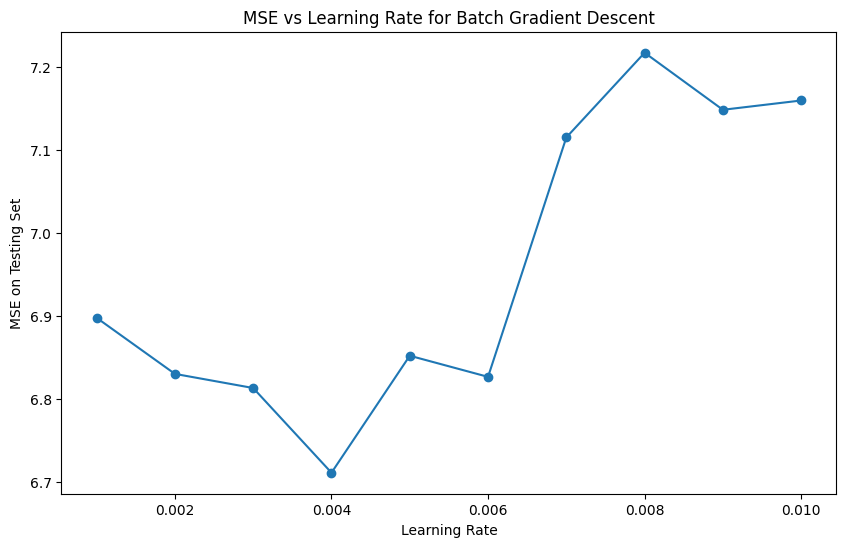

The best learning rate for Batch Gradient Descent is: 0.004


In [17]:
# Batch Gradient Descent
def batch_gradient_descent_with_lr(X, y, learning_rate=0.01, n_iterations=1000, tol=1e-6):
    m = len(y)
    w = np.random.randn(2)
    mse_history_train = []

    for iteration in range(n_iterations):
        gradients = 1/m * X.T.dot(X.dot(w) - y)
        w = w - learning_rate * gradients
        mse_train = compute_mse(X, y, w)
        mse_history_train.append(mse_train)

        # Stopping condition based on tolerance
        if len(mse_history_train) > 1 and np.abs(mse_history_train[-1] - mse_history_train[-2]) < tol:
            break

    return w, mse_history_train

# Function to evaluate MSE on testing set for different learning rates
def evaluate_mse_vs_learning_rate_batch(learning_rates, X_train, y_train, X_test, y_test):
    mse_test_lr_batch = []

    for lr in learning_rates:
        # Running Batch Gradient Descent for each learning rate
        w_batch, _ = batch_gradient_descent_with_lr(X_train, y_train, learning_rate=lr)
        mse_test = compute_mse(X_test, y_test, w_batch)
        mse_test_lr_batch.append(mse_test)

    return mse_test_lr_batch

# Define a range of learning rates
learning_rates = np.linspace(0.001, 0.01, 10)

# Evaluate MSE
mse_test_lr_batch = evaluate_mse_vs_learning_rate_batch(learning_rates, X_train, y_train, X_test, y_test)

# Plot MSE vs Learning Rate for Batch Gradient Descent
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mse_test_lr_batch, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("MSE on Testing Set")
plt.title("MSE vs Learning Rate for Batch Gradient Descent")
plt.show()

# Find the best learning rate
best_lr_batch = learning_rates[np.argmin(mse_test_lr_batch)]
print(f"The best learning rate for Batch Gradient Descent is: {best_lr_batch}")
